In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x_train = [[6],[8],[10],[14],[18]]
y_train = [[7],[9],[13],[17.5],[18]]
x_test = [[8],[9],[11],[16],[12]]
y_test =[[11],[8.5],[15],[18],[11]]

model = LinearRegression()
lm=model.fit(x_train,y_train)
y_pred = lm.predict(x_test)
mean_squared_error(y_test,y_pred)
print('R-squared:%.4f'%model.score(x_test,y_test))
print('MSE: %4f'%mean_squared_error(y_test,y_pred))

R-squared:0.6620
MSE: 3.839620


#Boston Data Set Information:
#Concerns housing values in suburbs of Boston.

Attribute Information:
1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per $10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's
    

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn import cross_validation
from sklearn.datasets import load_boston

boston = load_boston()

type(boston)


sklearn.utils.Bunch

In [8]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
print(boston.data.shape,
boston.target.shape)

(506, 13) (506,)


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

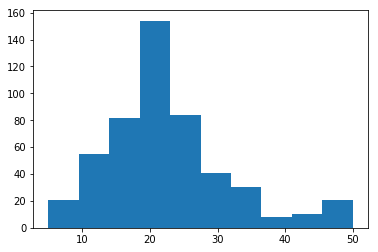

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(boston.target)

In [13]:
import numpy as np
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=4)

In [14]:
x = boston.data
y = boston.target


In [22]:
from sklearn.metrics import mean_squared_error
a=0.3
for name,method in [('lm', LinearRegression()),
                   ('lasso', Lasso(fit_intercept=True,alpha=a)),
                   ('ridge', Ridge(fit_intercept=True,alpha=a)),
                   ('elastic-net', ElasticNet(fit_intercept=True,alpha=a))]:
    cv = cross_validation.KFold(len(x), n_folds=10)
    
    for train,test in cv:
        method.fit(x[train],y[train])
        rsq = method.score(x[train], y[train])
        y_pred = method.predict(x[test])
        MSE = mean_squared_error(y[test], y_pred)
        RMSE = np.sqrt(MSE)
    rmse_10cv= np.average(RMSE)
    rsq_10cv = np.average(rsq)
    print("method name:",name)
    print ("R squared 10fold avg: %.4f"%rsq_10cv)
    print ("RMSE 10fold avg: %.4f"%rmse_10cv)
    print('coefficient:', method.coef_)
    print('intercept:', method.intercept_)
    print('\n')
    


method name: lm
R squared 10fold avg: 0.7421
RMSE 10fold avg: 3.3116
coefficient: [ -0.1    0.05   0.03   2.52 -17.66   3.81   0.01  -1.44   0.36  -0.02  -0.91   0.01  -0.56]
intercept: 35.595712943654206


method name: lasso
R squared 10fold avg: 0.7243
RMSE 10fold avg: 3.6288
coefficient: [-0.09  0.05 -0.02  0.   -0.    3.14  0.01 -1.07  0.34 -0.02 -0.72  0.01 -0.64]
intercept: 28.8544891436672


method name: ridge
R squared 10fold avg: 0.7417
RMSE 10fold avg: 3.3314
coefficient: [ -0.1    0.05   0.02   2.48 -14.42   3.83   0.01  -1.4    0.36  -0.02  -0.87   0.01  -0.56]
intercept: 33.49182281386835


method name: elastic-net
R squared 10fold avg: 0.7190
RMSE 10fold avg: 3.7083
coefficient: [-0.09  0.06 -0.04  0.12 -0.    2.36  0.01 -1.11  0.38 -0.02 -0.76  0.01 -0.69]
intercept: 35.54466167753162




In [24]:
lm = LinearRegression()
cv = cross_validation.KFold(len(x), n_folds=10)
for train, test in cv:
    lm.fit(x[train],y[train])
from sklearn.externals import joblib
joblib.dump(model, 'Boston_regression.pkl')

['Boston_regression.pkl']

In [25]:
type(model)

sklearn.linear_model.base.LinearRegression

In [27]:
import pandas as pd
df = pd.read_excel(r'boston_X.xls', sheet_name='boston.csv')
lm.predict(df)

array([29.93, 25.32, 30.84, 28.9 , 28.25, 25.61, 22.99, 19.63, 11.32, 18.99, 19.04, 21.74, 20.51, 19.75, 19.62, 19.43,
       20.44, 17.08, 15.91, 18.55, 12.64, 17.94, 15.98, 14.  , 15.93, 13.5 , 15.73, 14.83, 19.91, 21.19, 11.49, 18.46,
        8.48, 14.44, 13.75, 24.02, 22.41, 23.1 , 22.74, 31.44, 34.32, 27.8 , 24.99, 24.35, 22.94, 22.  , 20.2 , 18.21,
        9.01, 17.24, 21.29, 24.27, 27.67, 23.97, 14.9 , 31.55, 24.9 , 33.52, 22.07, 21.45, 18.32, 19.16, 24.65, 22.92,
       23.82, 30.16, 25.29, 20.77, 17.08, 20.54, 24.86, 21.41, 24.27, 23.67, 24.9 , 23.68, 22.84, 23.02, 20.98, 22.06,
       28.46, 27.35, 26.03, 25.17, 24.79, 27.95, 22.02, 25.98, 30.97, 30.89, 27.09, 27.48, 29.17, 29.13, 27.43, 28.56,
       24.65, 36.  , 34.96, 32.27, 24.66, 25.64, 19.68, 20.34, 21.51, 18.54, 17.07, 20.7 , 22.8 , 19.76, 20.36, 26.4 ,
       20.55, 20.5 , 25.04, 20.15, 23.1 , 23.57, 19.91, 20.39, 22.3 , 22.99, 21.05, 16.66, 21.09, 23.03, 14.82, 15.09,
       18.94, 13.94, 20.14, 19.52, 20.2 , 15.76,

In [28]:
joblib.dump(lm, 'Boston_regression.pkl')

['Boston_regression.pkl']